In [1]:
import sys, os

import random
import statistics as stat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nilmtk

sys.path.append(os.path.dirname(os.getcwd()))


## Import local modules

In [2]:
import adinilm.functions as F
from adinilm.enumerations import *
from adinilm.objs import DatasetProfile, ProfileHandler, NormalizationHandler
from adinilm.utils import paths_manager as pathsman
from adinilm.stats.Statistical_analysis import extract_states, state_plot


## Constants

In [3]:
## Variable declaration for dataset
BUILDING = 1
START_TIME = "2015-01-01"
# END_TIME = "2015-01-15"
END_TIME = "2015-03-31"

FRIDGE_FREEZER = "fridge"
KETTLE = "kettle"
DISHWASHER = "dish washer"
MICROWAVE = "microwave"
WASHER_DRYER = "washer dryer"

applist = [FRIDGE_FREEZER, WASHER_DRYER, KETTLE, DISHWASHER, MICROWAVE]


## Subsect Dataset

In [4]:
## Dataset initialization
dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
dataset.set_window(start=START_TIME, end=END_TIME)

In [5]:
def quantile_filter_2(sequence_length, data, p=50):
    new_mains = F.scan_sequences(data=data, mode="odd_window", seq_len=sequence_length)
    new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")
    return new_mains

In [6]:
power_elec = dataset.buildings[BUILDING].elec

In [7]:
print(f"Activation stats in the period [{START_TIME}, {END_TIME}]")
row = []

for app in applist:
    col = []
    app_name = app.upper()
    activations = power_elec[app].get_activations()
    total_num = len(activations)
    average_length = stat.mean(map(len, activations))
    max_length = max(map(len, activations))
    min_length = min(map(len, activations))
    col.append(total_num)
    col.append(average_length)
    col.append(max_length)
    col.append(min_length)
    row.append(col)

pd.DataFrame(row, columns=["No. of Activations", "Average Length", "Max Length", "Min Length"], index=applist)

Activation stats in the period [2015-01-01, 2015-03-31]


,No. of Activations,Average Length,Max Length,Min Length
fridge,2118,248.895656,3570,53
washer dryer,98,1008.918367,1308,246
kettle,464,27.193966,103,7
dish washer,31,1103.806452,1181,1020
microwave,812,18.865764,142,7


In [8]:
info = {
        "subsection" : {
                "building" : BUILDING,
                "start_time" : START_TIME,
                "end_time": END_TIME
        },
        "preprocessing" : [
                {
                        "activation_extension" : {
                                "mode" : "randomizer",
                                "num_full_samples" : 1200000
                        }
                },
                {
                        "normalization" : {
                                "mode" : "minmax",
                                "scope" : "local"
                        }
                }
        ],
        "appliances" : [FRIDGE_FREEZER, WASHER_DRYER, KETTLE, DISHWASHER, MICROWAVE],
        "appliance_data" : {
                FRIDGE_FREEZER : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                WASHER_DRYER : {               
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                KETTLE : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                DISHWASHER : {
                        "window" : 10,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                MICROWAVE : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                }
        }
}

In [9]:
CROSS_VAL = False

In [10]:
num_samples = len(power_elec[FRIDGE_FREEZER].power_series_all_data())

In [11]:

if CROSS_VAL:
    FULL_NUM_SAMPLES = 1100000
    
    ACTIVATION_EXTENSION_MAPPING = {
        FRIDGE_FREEZER : {
            "mode" : "rightpadder",
            "padding_mode" : 0,
        },
        WASHER_DRYER : {
            "mode" : "rightpadder",
            "padding_mode" : 0,
        },
        KETTLE : {
            "mode" : "rightpadder",
            "padding_mode" : 0,
        },
        DISHWASHER : {
            "mode" : "rightpadder",
            "padding_mode" : 0,
        },
        MICROWAVE : {
            "mode" : "rightpadder",
            "padding_mode" : 0,
        },
    }

else:
    FULL_NUM_SAMPLES = 1100000

    ACTIVATION_EXTENSION_MAPPING = {
        FRIDGE_FREEZER : {
            "mode" : "randomizer",
            "interval" : lambda : random.randint(70, 400),
        },
        WASHER_DRYER : {
            "mode" : "randomizer",
            "interval" : lambda : random.randint(200, 1700),
        },
        KETTLE : {
            "mode" : "randomizer",
            "interval" : lambda : random.randint(10, 200),
        },
        DISHWASHER : {
            "mode" : "randomizer",
            "interval" : lambda : random.randint(200, 1700),
        },
        MICROWAVE : {
            "mode" : "randomizer",
            "interval" : lambda : random.randint(10, 200),
        },
    }

C:\Users\MTinaco\AppData\Local\Temp\ipykernel_36692\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")
C:\Users\MTinaco\AppData\Local\Temp\ipykernel_36692\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")
C:\Users\MTinaco\AppData\Local\Temp\ipykernel_36692\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mo

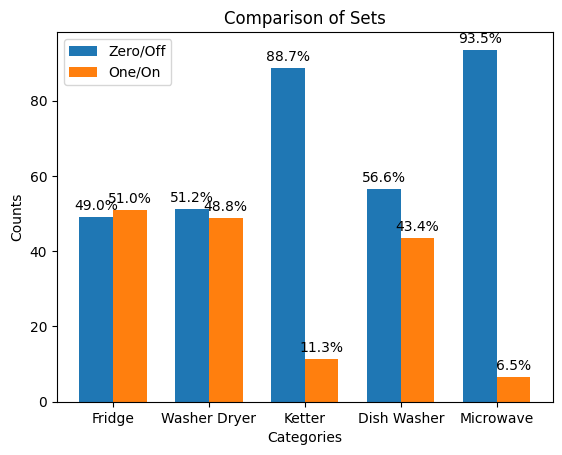

In [12]:
states = []
targets = []
unfiltered_power = []

normalizer = NormalizationHandler(mode="minmax", min_val=0, max_val=3300)

for app in info["appliances"]:
        elec = power_elec[app]
        mode = ACTIVATION_EXTENSION_MAPPING[app]["mode"]
        if CROSS_VAL:
                padding_mode = ACTIVATION_EXTENSION_MAPPING[app]["padding_mode"]

                extended_activations = F.extend_activations(elec, mode=mode, num_full_samples=FULL_NUM_SAMPLES, padding_mode=padding_mode)
        else:
                interval = ACTIVATION_EXTENSION_MAPPING[app]["interval"]

                extended_activations = F.extend_activations(elec, mode=mode, num_full_samples=FULL_NUM_SAMPLES, interval=interval)
        unfiltered_power.append(extended_activations)
        filtered_data = quantile_filter_2(info["appliance_data"][app]["window"], extended_activations, p=50)
        info["appliance_data"][app]['min'] = 0.0
        info["appliance_data"][app]['max'] = float(filtered_data.max())
        info["appliance_data"][app]['on_power_threshold'] = elec.on_power_threshold()
        binarized_data = F.binarization(filtered_data, mode="threshold", threshold=power_elec[app].on_power_threshold())
        normalizer.select_mode(mode="minmax", min_val=info["appliance_data"][app]['min'], max_val=info["appliance_data"][app]['max'])
        normalized_data = normalizer.normalize(filtered_data)
        states.append(binarized_data)
        targets.append(normalized_data)

zero, one = extract_states(states)
state_plot(zero, one)

In [20]:
states = np.stack(states).T
targets = np.stack(targets).T

In [21]:
mains = np.sum(unfiltered_power, axis=0)

In [22]:
mains_denoise = quantile_filter_2(10, mains, 50)
mains = mains-np.percentile(mains, 1)
mains = np.where(mains < mains_denoise, mains_denoise, mains)
mains = quantile_filter_2(10, mains, 50)

C:\Users\MTinaco\AppData\Local\Temp\ipykernel_31412\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")


In [23]:
normalizer.select_mode(mode="minmax", min_val=mains_denoise.min(), max_val=mains_denoise.max())
norm_mains_denoise = normalizer.normalize(mains_denoise)

normalizer.select_mode(mode="minmax", min_val=mains.min(), max_val=mains.max())
norm_mains = normalizer.normalize(mains)

## Profile Handling

In [24]:
ProfileHandler.mkdir(pathsman.PROFILES_DIR, exist_ok=True)
prof = DatasetProfile(parent_dir=pathsman.PROFILES_DIR,
                      handler=NILMProjects.UNETNILM.value,
                      dataset_name="ukdale",
                      metadata=info,
                      mode="w")
ProfileHandler.write(norm_mains_denoise, norm_mains, targets, states, profile=prof, subdir="crossval" if CROSS_VAL else "training")

Full path: C:\Users\MTinaco\Dev\Solutions\cos-algo-nilm\profiles\unetnilm_ukdale_20240321_155858
                